# Ankiety PyLight

Zadania:
- Procent płci / meetup - Czy stosunek płci się utrzymuje, czy zmienia się?
- Nowa zmienna: indeks zadowolenia ze spotkania (prez1-przyd + prez2-przyd + prez1-przyst + prez2-przyst)\*5 -> wartość od 5 do 100
  - wg grup wiekowych (wiek2)
  - wg płci
  - \[potrzeba więcej danych\] wg uczestnictwa - czy nowi uczestnicy lepiej oceniają meetup? ("freq2"[To moje pierwsze!])
- Proponowane tematy (temat) - najczęstsze słowa?
- Skąd ludzie wiedzą o spotkaniu? - najczęstsze wartości, procentowo; stacked barchart by meetup

In [60]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [46]:
resp = pd.read_csv('responses_merged.csv', index_col='meetup')

In [25]:
resp.head()

,panel-przyd,widz,wiek1,prez2-przyd,panel-future,znajomosc,freq2,prez1-przyd,druk,temat,freq1,sex,prez2-przyst,prez1-przyst,wiek2,skad,cel,ang,panel-przyst
meetup,,,,,,,,,,,,,,,,,,,
1,NaN,"Tak, na żywo",18-30,5.0,NaN,jeszcze nic nie wiem;robię obecnie kurs typu b...,NaN,4.0,NaN,NaN,NaN,Mężczyzna,NaN,5.0,NaN,od kogoś z teamu PyLight,"nie mam na razie preferencji, najpierw chcę po...",Tak,NaN
1,NaN,"Tak, na żywo",18-30,5.0,NaN,używam Pythona hobbystycznie;używam Pythona za...,NaN,4.0,NaN,NaN,NaN,Mężczyzna,3.0,2.0,NaN,od kogoś z teamu PyLight,"web (back-end, web scraping, boty);data scienc...",Tak,NaN
1,NaN,Nie,30-40,NaN,NaN,używam Pythona zawodowo,NaN,NaN,NaN,NaN,NaN,Mężczyzna,NaN,NaN,NaN,od kogoś z teamu PyLight,"web (back-end, web scraping, boty);nauka (obli...",Tak,NaN
1,NaN,"Tak, na żywo",18-30,NaN,NaN,używam Pythona zawodowo,NaN,NaN,NaN,NaN,NaN,Mężczyzna,NaN,NaN,NaN,na facebooku,"web (back-end, web scraping, boty);nauka (obli...",Tak,NaN
1,NaN,"Tak, na żywo",18-30,5.0,NaN,używam Pythona hobbystycznie;używam Pythona za...,NaN,5.0,NaN,NaN,NaN,Kobieta,5.0,5.0,NaN,od kogoś z teamu PyLight,"nie mam na razie preferencji, najpierw chcę po...",Tak,NaN


In [26]:
resp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 1 to 8
Data columns (total 19 columns):
panel-przyd     25 non-null float64
widz            139 non-null object
wiek1           73 non-null object
prez2-przyd     115 non-null float64
panel-future    24 non-null float64
znajomosc       37 non-null object
freq2           17 non-null object
prez1-przyd     115 non-null float64
druk            23 non-null object
temat           39 non-null object
freq1           25 non-null object
sex             163 non-null object
prez2-przyst    114 non-null float64
prez1-przyst    115 non-null float64
wiek2           91 non-null object
skad            164 non-null object
cel             37 non-null object
ang             37 non-null object
panel-przyst    25 non-null float64
dtypes: float64(7), object(12)
memory usage: 25.6+ KB


In [23]:
resp['prez2-przyst'].mean()

3.8859649122807016

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DF94BAAC8>,
      dtype=object)

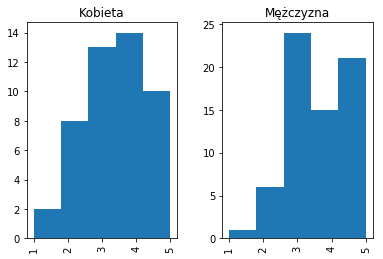

In [44]:
resp.hist(column="prez2-przyd",by="sex", bins=5)

In [53]:
resp['wiek1'].value_counts()

18-30    53
31-40    16
41-50     4
Name: wiek1, dtype: int64

In [62]:
resp['temat'].nunique()

38